In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [3]:
depth_nob = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth_nob,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

# centers mask bathy with bay
depth_bay = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)

In [4]:
def get_snapshot_at_level(ds,tt,zz,fld):
    W = ds[fld][tt,zz,:,:]
    return(W)

def plot_field_w(ax,tt,lon,lat,eta,time,mask,zind,
                 cmap=cmo.cm.balance,vmin=-0.3, vmax=0.3):
    ax.set_facecolor('tan')
    pc = ax.pcolormesh(lon,lat, 
                       np.ma.masked_array(eta,mask=mask[zind,:,:]),
                       cmap=cmap, vmin=vmin, vmax=vmax)
    ax.contour(lon,lat,depth_nob, levels=[0], color='k')
    ax.contour(lon,lat,depth_bay, levels=[0], color='0.5')
      
    if zind>30:
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755]) 
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                          cax=cbar_ax, orientation='vertical', 
                          format='%1.2f', label='$w$ ($10^{-5}$ m s$^{-1}$)')
    
    ax.set_title('z=%1.1f m, t=%1.1f h'%(Zl[zind],time[tt]/3600))
    ax.set_aspect(1)
    return(ax)

def init():
    tt=0
    Wbay1 = get_snapshot_at_level(ds, 0, zz, 'WVEL')
    Wnb1 = get_snapshot_at_level(ds2, 0, zz, 'WVEL')
    
    Wbay2 = get_snapshot_at_level(ds, 0, zz2, 'WVEL')
    Wnb2 = get_snapshot_at_level(ds2, 0, zz2, 'WVEL')
    
    axx= plot_field_w(ax1,tt,lon,lat,(Wbay1-Wnb1)*1E5,time,
                      mask,zz,cmap=cmap, vmin=-1, vmax=1)
    axxx = plot_field_w(ax2,tt,lon,lat,(Wbay2-Wnb2)*1E5,time,
                        mask,zz2,cmap=cmap, vmin=-1, vmax=1)
    ax1.set_xlabel('lon')
    ax1.set_ylabel('lat')
    ax2.set_xlabel('lon')
    ax2.set_yticks([])

def animate(t):
    tt=3*t
    print(tt)
    Wbay1 = get_snapshot_at_level(ds, tt, zz, 'WVEL')
    Wnb1 = get_snapshot_at_level(ds2, tt, zz, 'WVEL')
    
    Wbay2 = get_snapshot_at_level(ds, tt, zz2, 'WVEL')
    Wnb2 = get_snapshot_at_level(ds2, tt, zz2, 'WVEL')
    
    axx= plot_field_w(ax1,tt,lon,lat,(Wbay1-Wnb1)*1E5,
                      time,mask,zz,cmap=cmap, vmin=-1, vmax=1)
    axxx = plot_field_w(ax2,tt,lon,lat,(Wbay2-Wnb2)*1E5,
                        time,mask,zz2,cmap=cmap, vmin=-1, vmax=1)
    ax1.set_xlabel('lon')
    ax1.set_ylabel('lat')
    ax2.set_xlabel('lon')
    ax2.set_yticks([]) 

In [5]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)

0
3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147
150
153
156
159
162
165
168
171
174
177
180
183
186
189
192
195
198
201
204
207
210
213
216
219
222
225
228
231
234
237
240
243
246
249
252
255
258
261
264
267


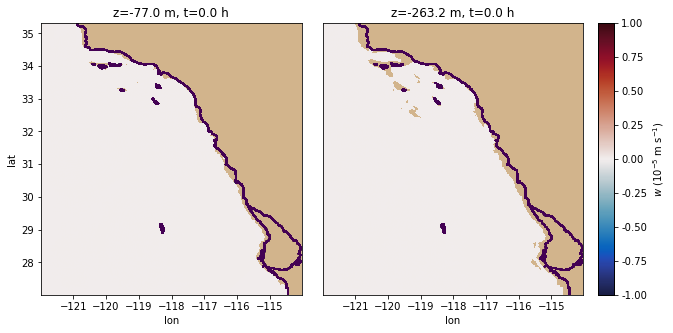

In [8]:
cmap=cmo.cm.balance
zz = 21
zz2 = 43

fig = plt.figure(figsize=(10,5))
gs = GridSpec(1,2, width_ratios=[1,1], wspace=0.02)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Uncomment lines below to run and save animation
anim = animation.FuncAnimation(fig, animate, init_func=init, blit=False,
                               frames=90, repeat=False)
anim.save('w_Bay-NoBay_febTS.mov', writer=writer, dpi=500)

In [7]:
5*86400/600

720.0